<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

<div class="alert alert-info">
<h2> План<a class="tocSkip"> </h2>

1. Импортируем библиотеки
 
2. Загружаем данные из файлов
    
3. Изучаем общую информацию о данных
 
4. Проверяем наличие дубликатов
    
5. Меняем формат колонки "date"
 
6. Находим MAE для recovery
    
7. Ищем пропуски и заполняем их
 
8. Анализируем признаки, недоступные в тестовой выборке
     
10. Выводы по результатам проведенной подготовки данных      
</div>

In [81]:
#импортируем библиотеки

import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [82]:
#введем константы:

STATE = 12345

In [83]:
#загружаем данные из файлов

train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [84]:
#выводим данные из загруженных файлов на экран

display(train.head(),test.head(),full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [85]:
#выводим на экран общую информацию о полученных датафреймах

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [87]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [88]:
# проверяем наличие дубликатов

print(train.duplicated().sum())
print(train.duplicated().sum())
print(train.duplicated().sum())

0
0
0


In [90]:
#посчитаем показатель эффективность обогащения (recovery_check) в новой колонке по формуле:
#recovery_check = ((C*(F-T))/F*(C-T))*100%,
#C - доля золота в концентрате после флотации (rougher.output.concentrate_au)
#F - доля золота в сырье/концентрате до флотации (rougher.input.feed_au)
#T - доля золота в отвальных хвостах после флотации (rougher.output.tail_au)

train['recovery_check'] = (train['rougher.output.concentrate_au']*(
    train['rougher.input.feed_au']-train['rougher.output.tail_au']))/(train['rougher.input.feed_au']*(
    train['rougher.output.concentrate_au']-train['rougher.output.tail_au']))*100
print(train.loc[:,['recovery_check','rougher.output.recovery']])

#посчитаем показатель MAE

print('MAE:', mean_absolute_error(train['rougher.output.recovery'], train['recovery_check']))

       recovery_check  rougher.output.recovery
0           87.107763                87.107763
1           86.843261                86.843261
2           86.842308                86.842308
3           87.226430                87.226430
4           86.688794                86.688794
...               ...                      ...
14144       89.574376                89.574376
14145       87.724007                87.724007
14146       88.890579                88.890579
14147       89.858126                89.858126
14148       89.514960                89.514960

[14149 rows x 2 columns]
MAE: 9.73512347450521e-15


In [91]:
#проверяем наличие пропусков

print(train.isna().sum())
print(test.isna().sum())
print(full.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
recovery_check                                  0
Length: 88, dtype: int64
date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_

In [92]:
#заменяем пропуски на значения предыдущих ячеек (по условию задачи значения соседних ячеек отличаются незначительно)

train = train.fillna("!!!")
test = test.fillna("!!!")
full = full.fillna("!!!")

#создаем функцию для заполнения пропусков

def null(df):
    
#задаем  цикл, в котором заменяем значения "!!!" на новые

    for col in df.columns:
        for item in range(len(df)):
            if df.loc[item,col] == "!!!":
                df.loc[item,col] = df.loc[(item-1),col] #меняем пустое значение на значение предыдущей ячейки

#запускаем функцию по заполнению пропусков в каждом датафрейме   

null(train)
null(test)
null(full)

#проверяем наличие пропусков

print(train.isna().sum())


date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
recovery_check                                0
Length: 88, dtype: int64


In [93]:
#определим признаки, которые есть в обучающей выборке, но отсутствуют в тестовой

test_missed_items=train.columns.difference(test.columns)
display(test_missed_items)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'recovery_check', 'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_so

<div class="alert alert-block alert-info">
<h2> Выводы. Подготовка данных.<a class="tocSkip"> </h2>
    
1. Заголовки переименовывать не нужно, дубликатов нет.

2. Поменяли формат колонки "date" на тип "datetime"

3. Проверили правильность расчета эффективности обогащения (далее, ЭО). ЭО рассчитана корректно: MAE имеет низкое значение (расчетные данные почти не отличаются от табличных). 

4. Заполнили пропуски значениеями вышестоящих соседних ячеек (по условию, значения соседних ячеек сильно не отличаются).

5. В тестовой выборке отсутствуют признаки с типом параметра output (параметры продукта) и calculation (расчётные характеристики). По условию, "некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже."   
</div>

## Анализ данных

<div class="alert alert-info">
<h2> План<a class="tocSkip"> </h2>

1. Изучим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки
 
2. Сравним распределение размеров гранул сырья на обучающей и тестовой выборках
    
3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах
 
4. Сделаем выводы по результатам анализа данных      
</div>

In [94]:
# рассчитаем среднее арифметическое и стандартное отклонение, чтобы оценить изменение концентрации металлов 
#расчеты для золота

print("Среднее арифметическое содержания ЗОЛОТА в зависимости от технологического этапа")
print((full[['final.output.concentrate_au','primary_cleaner.output.concentrate_au','rougher.output.concentrate_au',
             'rougher.input.feed_au']].mean()))
print()
print("Стандартное отклонение содержания ЗОЛОТА в зависимости от технологического этапа")
print(np.std(full[['final.output.concentrate_au','primary_cleaner.output.concentrate_au','rougher.output.concentrate_au',
                   'rougher.input.feed_au']]))


Среднее арифметическое содержания ЗОЛОТА в зависимости от технологического этапа
final.output.concentrate_au              44.076513
primary_cleaner.output.concentrate_au    32.119400
rougher.output.concentrate_au            19.772000
rougher.input.feed_au                     8.266097
dtype: float64

Стандартное отклонение содержания ЗОЛОТА в зависимости от технологического этапа
final.output.concentrate_au              5.129652
primary_cleaner.output.concentrate_au    5.627466
rougher.output.concentrate_au            3.753503
rougher.input.feed_au                    1.955042
dtype: float64


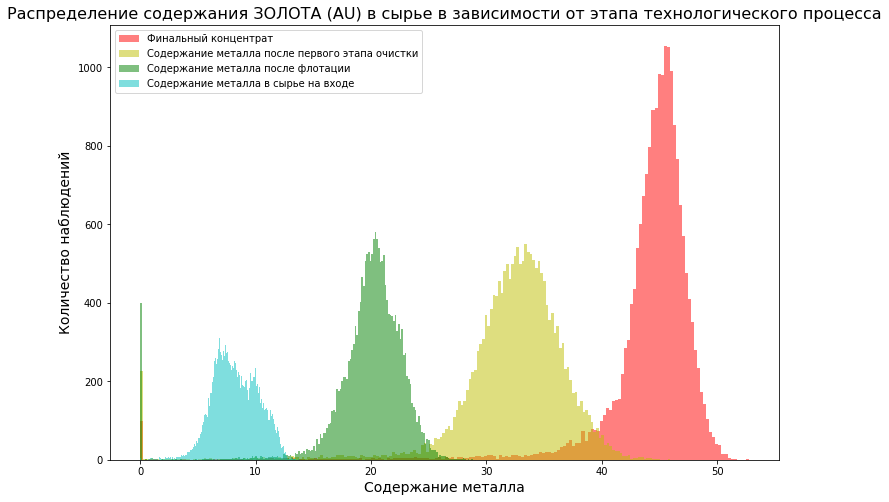

In [95]:
#визуализируем распределение концентрации металла в зависимости от технологической стадии
#визуализация для золота

full['final.output.concentrate_au'].plot(kind='hist', bins=200, alpha=0.5, color='r', figsize=(12, 8))
full['primary_cleaner.output.concentrate_au'].plot(kind='hist', color='y', bins=200, alpha=0.5)
full['rougher.output.concentrate_au'].plot(kind='hist', color='g', bins=200, alpha=0.5)
full['rougher.input.feed_au'].plot(kind='hist', color='c', bins=200, alpha=0.5)
plt.legend(['Финальный концентрат','Содержание металла после первого этапа очистки', 
            'Содержание металла после флотации', 'Содержание металла в сырье на входе'])
plt.xlabel('Содержание металла', fontsize = 14)
plt.ylabel('Количество наблюдений', fontsize = 14)
plt.title('Распределение содержания ЗОЛОТА (AU) в сырье в зависимости от этапа технологического процесса', fontsize = 16)
plt.show()

In [96]:
#расчеты для серебра

print("Среднее арифметическое содержания СЕРЕБРА в зависимости от технологического этапа")
print((full[['final.output.concentrate_ag','primary_cleaner.output.concentrate_ag','rougher.output.concentrate_ag',
             'rougher.input.feed_ag']].mean()))
print()
print("Стандартное отклонение содержания СЕРЕБРА в зависимости от технологического этапа")
print(np.std(full[['final.output.concentrate_ag','primary_cleaner.output.concentrate_ag','rougher.output.concentrate_ag',
                   'rougher.input.feed_ag']]))

Среднее арифметическое содержания СЕРЕБРА в зависимости от технологического этапа
final.output.concentrate_ag               5.168387
primary_cleaner.output.concentrate_ag     8.442408
rougher.output.concentrate_ag            11.994759
rougher.input.feed_ag                     8.794927
dtype: float64

Стандартное отклонение содержания СЕРЕБРА в зависимости от технологического этапа
final.output.concentrate_ag              1.372327
primary_cleaner.output.concentrate_ag    2.054412
rougher.output.concentrate_ag            2.733792
rougher.input.feed_ag                    1.936798
dtype: float64


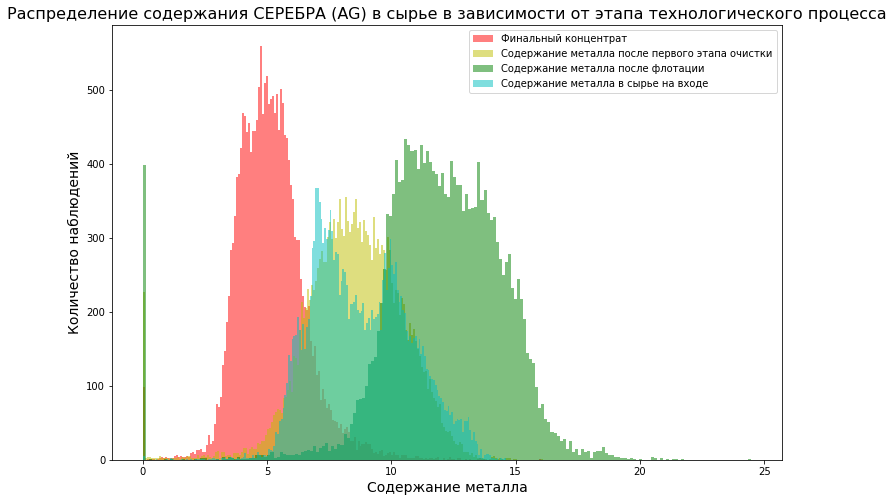

In [97]:
#визуализация для серебра

full['final.output.concentrate_ag'].plot(kind='hist', bins=200, alpha=0.5, color='r', figsize=(12, 8))
full['primary_cleaner.output.concentrate_ag'].plot(kind='hist', color='y', bins=200, alpha=0.5)
full['rougher.output.concentrate_ag'].plot(kind='hist', color='g', bins=200, alpha=0.5)
full['rougher.input.feed_ag'].plot(kind='hist', color='c', bins=200, alpha=0.5)
plt.legend(['Финальный концентрат','Содержание металла после первого этапа очистки', 
            'Содержание металла после флотации', 'Содержание металла в сырье на входе'])
plt.xlabel('Содержание металла', fontsize = 14)
plt.ylabel('Количество наблюдений', fontsize = 14)
plt.title('Распределение содержания СЕРЕБРА (AG) в сырье в зависимости от этапа технологического процесса', fontsize = 16)
plt.show()

In [98]:
#расчеты для свинца

print("Среднее арифметическое содержания СВИНЦА в зависимости от технологического этапа")
print((full[['final.output.concentrate_pb','primary_cleaner.output.concentrate_pb',
             'rougher.output.concentrate_pb','rougher.input.feed_pb']].mean()))
print()
print("Стандартное отклонение содержания СВИНЦА в зависимости от технологического этапа")
print(np.std(full[['final.output.concentrate_pb','primary_cleaner.output.concentrate_pb',
                   'rougher.output.concentrate_pb','rougher.input.feed_pb']]))

Среднее арифметическое содержания СВИНЦА в зависимости от технологического этапа
final.output.concentrate_pb              9.978821
primary_cleaner.output.concentrate_pb    9.810317
rougher.output.concentrate_pb            7.606272
rougher.input.feed_pb                    3.585096
dtype: float64

Стандартное отклонение содержания СВИНЦА в зависимости от технологического этапа
final.output.concentrate_pb              1.669185
primary_cleaner.output.concentrate_pb    2.572187
rougher.output.concentrate_pb            1.796710
rougher.input.feed_pb                    1.062945
dtype: float64


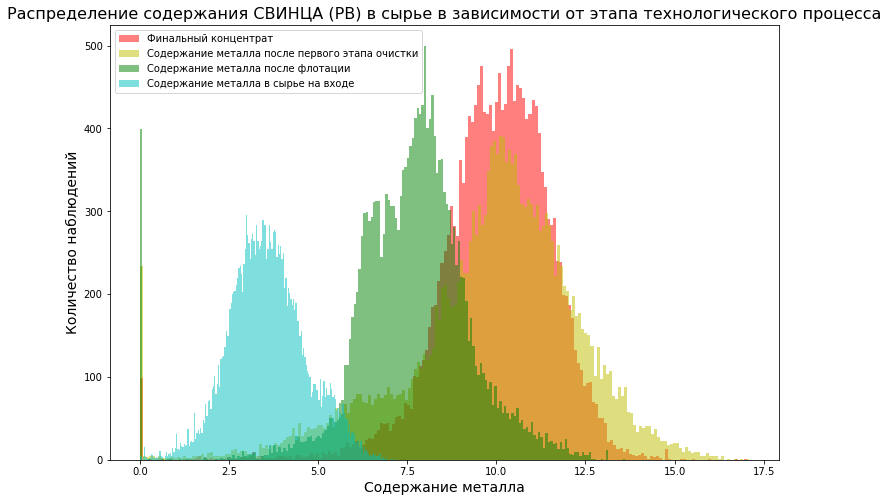

In [99]:
#визуализация для свинца

full['final.output.concentrate_pb'].plot(kind='hist', bins=200, alpha=0.5, color='r', figsize=(12, 8))
full['primary_cleaner.output.concentrate_pb'].plot(kind='hist', color='y', bins=200, alpha=0.5)
full['rougher.output.concentrate_pb'].plot(kind='hist', color='g', bins=200, alpha=0.5)
full['rougher.input.feed_pb'].plot(kind='hist', color='c', bins=200, alpha=0.5)
plt.legend(['Финальный концентрат','Содержание металла после первого этапа очистки', 
            'Содержание металла после флотации', 'Содержание металла в сырье на входе'])
plt.xlabel('Содержание металла', fontsize = 14)
plt.ylabel('Количество наблюдений', fontsize = 14)
plt.title('Распределение содержания СВИНЦА (PB) в сырье в зависимости от этапа технологического процесса', fontsize = 16)
plt.show()

In [100]:
#cравним распределение размеров гранул сырья на обучающей и тестовой выборках
#этап сырья на входе

print("Среднее арифметическое размера гранул обучающей и тестовой выборки на этапе сырья на входе")
print(train['rougher.input.feed_size'].mean(),test['rougher.input.feed_size'].mean())
print()
print("Стандартное отклонение размера гранул обучающей и тестовой выборки на этапе сырья на входе")
print(np.std(train['rougher.input.feed_size']),np.std(test['rougher.input.feed_size']))

Среднее арифметическое размера гранул обучающей и тестовой выборки на этапе сырья на входе
60.23985599255736 55.95275402889511

Стандартное отклонение размера гранул обучающей и тестовой выборки на этапе сырья на входе
23.00449662459302 19.07853057739454


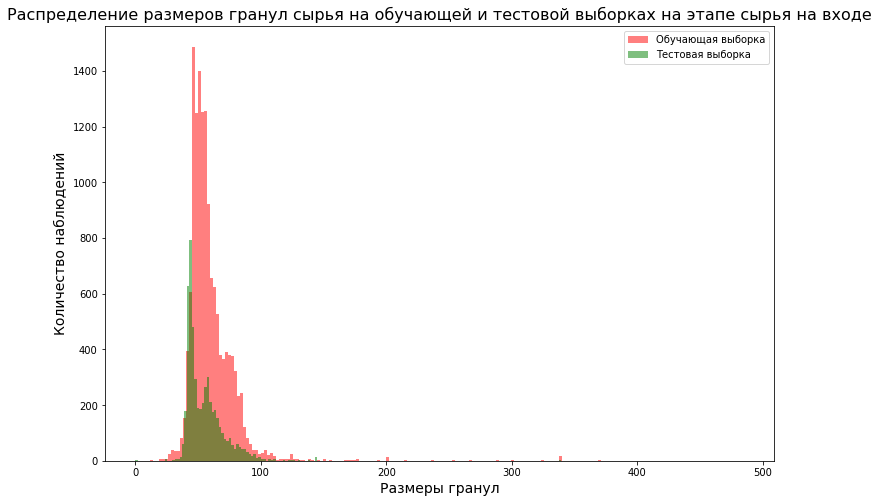

In [101]:
#визуализируем распределение размеров гранул сырья на обучающей и тестовой выборках в зависимости от технологической стадии
#этап сырья на входе

train['rougher.input.feed_size'].plot(kind='hist', bins=200, alpha=0.5, color='r', figsize=(12, 8))
test['rougher.input.feed_size'].plot(kind='hist', color='g', bins=200, alpha=0.5)
plt.legend(['Обучающая выборка','Тестовая выборка'])
plt.xlabel('Размеры гранул', fontsize = 14)
plt.ylabel('Количество наблюдений', fontsize = 14)
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках на этапе сырья на входе', fontsize = 16)
plt.show()

In [102]:
#этап первой очистки

print("Среднее арифметическое размера гранул обучающей и тестовой выборки на этапе первой очистки")
print(train['primary_cleaner.input.feed_size'].mean(),test['primary_cleaner.input.feed_size'].mean())
print()
print("Стандартное отклонение размера гранул обучающей и тестовой выборки на этапе первой очистки")
print(np.std(train['primary_cleaner.input.feed_size']),np.std(test['primary_cleaner.input.feed_size']))

Среднее арифметическое размера гранул обучающей и тестовой выборки на этапе первой очистки
7.322309906901314 7.266339191270906

Стандартное отклонение размера гранул обучающей и тестовой выборки на этапе первой очистки
0.6140405639148665 0.6101610916571282


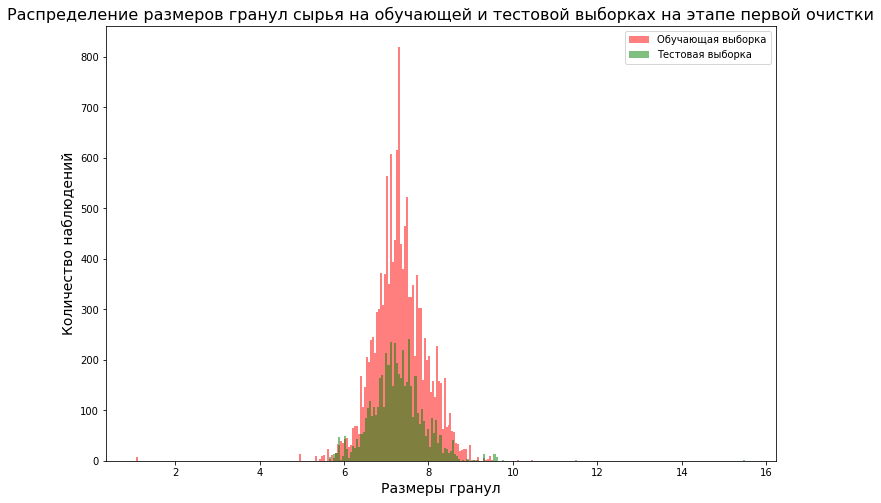

In [103]:
#этап первой очистки

train['primary_cleaner.input.feed_size'].plot(kind='hist', bins=200, alpha=0.5, color='r', figsize=(12, 8))
test['primary_cleaner.input.feed_size'].plot(kind='hist', color='g', bins=200, alpha=0.5)
plt.legend(['Обучающая выборка','Тестовая выборка'])
plt.xlabel('Размеры гранул', fontsize = 14)
plt.ylabel('Количество наблюдений', fontsize = 14)
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках на этапе первой очистки', fontsize = 16)
plt.show()

In [104]:
#исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах
#создадим 4 признака с суммарной концентрацией всех металлов на рассматриваемых стадиях технологического процесса

full['total_final'] = full[['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol']].sum(axis = 1)
full['total_primary_cleaner'] = full[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_sol']].sum(axis = 1)
full['total_rougher'] = full[['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol']].sum(axis = 1)
full['total_feed'] = full[['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol']].sum(axis = 1)

#расчеты среднего арифметического и стандартного отклонения

print("Среднее арифметическое содержания МЕТАЛЛОВ в зависимости от технологического этапа")
print((full[['total_final','total_primary_cleaner',
             'total_rougher','total_feed']].mean()))
print()
print("Стандартное отклонение содержания МЕТАЛЛОВ в зависимости от технологического этапа")
print(np.std(full[['total_final','total_primary_cleaner',
             'total_rougher','total_feed']]))

Среднее арифметическое содержания МЕТАЛЛОВ в зависимости от технологического этапа
total_final              68.653624
total_primary_cleaner    60.764731
total_rougher            68.170865
total_feed               57.320789
dtype: float64

Стандартное отклонение содержания МЕТАЛЛОВ в зависимости от технологического этапа
total_final               7.427345
total_primary_cleaner    10.017014
total_rougher            12.490957
total_feed                7.212494
dtype: float64


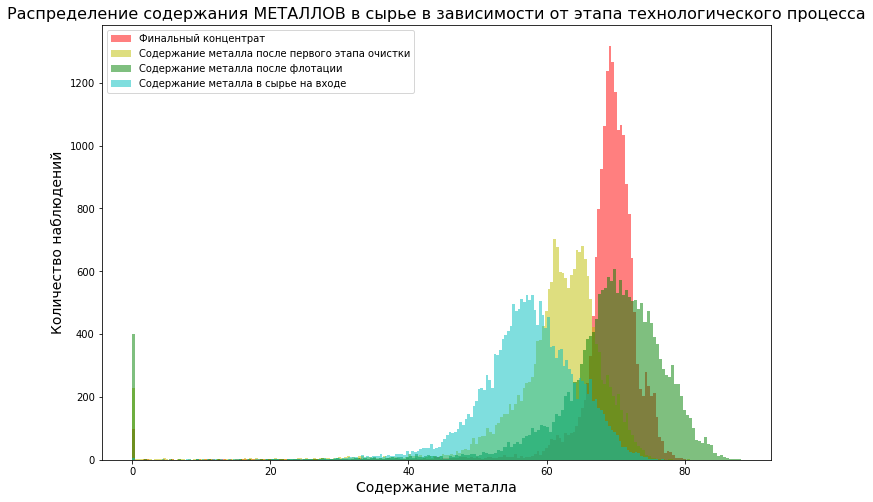

In [105]:
#визуализируем распределение содержания металлов в сырье в зависимости от этапа технологического процесса

full['total_final'].plot(kind='hist', bins=200, alpha=0.5, color='r', figsize=(12, 8))
full['total_primary_cleaner'].plot(kind='hist', color='y', bins=200, alpha=0.5)
full['total_rougher'].plot(kind='hist', color='g', bins=200, alpha=0.5)
full['total_feed'].plot(kind='hist', color='c', bins=200, alpha=0.5)
plt.legend(['Финальный концентрат','Содержание металла после первого этапа очистки', 
            'Содержание металла после флотации', 'Содержание металла в сырье на входе'])
plt.xlabel('Содержание металла', fontsize = 14)
plt.ylabel('Количество наблюдений', fontsize = 14)
plt.title('Распределение содержания МЕТАЛЛОВ в сырье в зависимости от этапа технологического процесса', fontsize = 16)
plt.show()

In [106]:
#удалим аномалии в выборках full и train

def dell(sample):
    sample = sample[(sample['rougher.input.feed_au'] != 0) & (sample['primary_cleaner.output.concentrate_sol'] != 0) & (
    sample['primary_cleaner.output.concentrate_pb'] != 0) & (sample['primary_cleaner.output.concentrate_ag'] != 0) & (
    sample['primary_cleaner.output.concentrate_au'] != 0) & (sample['rougher.input.feed_ag'] != 0) & (
    sample['rougher.input.feed_pb'] != 0) & (sample['rougher.input.feed_sol'] != 0) & (
    sample['rougher.output.concentrate_au'] != 0) & (sample['rougher.output.concentrate_ag'] != 0) & (
    sample['rougher.output.concentrate_pb'] != 0) & (sample['rougher.output.concentrate_sol'] != 0) & (
    sample['final.output.concentrate_au'] != 0) & (sample['final.output.concentrate_ag'] != 0) & (
    sample['final.output.concentrate_pb'] != 0) & (sample['final.output.concentrate_sol'] != 0)]
dell(full)
dell(train)

<div class="alert alert-info">
<h2>Выводы. Анализ данных.<a class="tocSkip"> </h2>

1. Концентрация металлов золота и свинца увеличивается по мере изменения технологической стадии с темпом в 1.5-2 раза. У серебра отсутствует явная динамика. Стандартное отклонение с новыми этапами либо не меняется, либо увеличивается, в основном из-за удлиненния левого хвоста.
 
2. Распределение размеров гранул сырья на обучающей и тестовой выборках на этапе сырья на входе отличается на 6,7%, на этапе сырья на входе отличие средних составляет менее 1%. Вывод: изменения не укажут значимого влияние на обучение моделей. 
    
3. Суммарная концентрация всех веществ на разных стадиях увеличивается. На финальной стадии резко уменьшается стандартное отклонение (если не брать в учет длинный хвост слева). 
</div>

## Модель

<div class="alert alert-info">
<h2> План<a class="tocSkip"> </h2>

1. Удалим колонки, которые нам не нужны для обучения моделей
 
2. Сформируем новые обучающие и тестовые выборки

3. Рассчитаем формулу smape
    
3. Обучим модель на тренировочной выборке для каждого из технологических этапов алгоритмами линейная регрессия, дерево решений и случайный лес
 
4. Сделаем выводы по результатам моделирования     
</div>

In [107]:
#поменяем тип признаков на тип "float32"

train.loc[:, train.columns !='date'] = train.loc[:, train.columns !='date'].astype('float32')
test.loc[:, test.columns !='date'] = test.loc[:, test.columns !='date'].astype('float32')
full.loc[:, full.columns !='date'] = full.loc[:, full.columns !='date'].astype('float32')

In [108]:
#из датасета full добавим в выборку test отсутствующие целевые колонки 'rougher.output.recovery','final.output.recovery'

test = test.merge(full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')
train = train.drop(columns=test_missed_items, axis=1)
train = train.merge(full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

In [109]:
#удалим колонки, которые нам не нужны для обучения моделей

full = full.drop('date', axis=1)
train = train.drop('date', axis=1)
test = test.drop('date', axis=1)
full = full.drop('total_final', axis=1)
full = full.drop('total_primary_cleaner', axis=1)
full = full.drop('total_rougher', axis=1)
full = full.drop('total_feed', axis=1)

In [110]:
#разобьем данные на целевые и параметры для этапов rougher и final 

#обучающая выборка

features_rougher_train = train.drop('rougher.output.recovery', axis=1)
target_rougher_train = train['rougher.output.recovery']
features_final_train = train.drop('final.output.recovery', axis=1)
target_final_train = train['final.output.recovery']

#тестовая выборка

features_rougher_test = test.drop('rougher.output.recovery', axis=1)
target_rougher_test = test['rougher.output.recovery']
features_final_test = test.drop('final.output.recovery', axis=1)
target_final_test = test['final.output.recovery']

In [111]:
#создадим функцию для расчета smape

def smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/((np.abs(target)+np.abs(predict))/2))*100*(-1)
    return smape

#рассчитываем параметр scoring для cross_val_score

smape_formula = make_scorer(smape, greater_is_better = False)

In [112]:
#обучим модель на тренировочной выборке для каждого из технологических этапов алгоритмом линейной регрессии
#флотация

model_lr = LinearRegression()
smape_rougher_train = cross_val_score(model_lr, features_rougher_train,target_rougher_train, scoring=smape_formula, cv=5)
smape_rougher_train_mean = smape_rougher_train.mean()

#финальный концетрат

smape_final_train = cross_val_score(model_lr, features_final_train,target_final_train, scoring=smape_formula, cv=5)
smape_final_train_mean = smape_final_train.mean()

#рассчитаем итоговый smape

result_smape = 0.25*smape_rougher_train_mean+0.75*smape_final_train_mean
print("Итоговая sMape для линейной регрессии:", result_smape)

Итоговая sMape для линейной регрессии: 11.984776618670805


In [115]:
#обучим модель (C ЦИКЛОМ) на тренировочной выборке для каждого из технологических этапов алгоритмом дерево решений
#флотация

best = 1000
param = 0
for n in range(1, 15, 1):
    model_dt = DecisionTreeRegressor(max_depth=n, random_state=STATE)
    smape_rougher = cross_val_score(model_dt, features_rougher_train,target_rougher_train, scoring=smape_formula,cv=5)
    smape_rougher_train_mean = smape_rougher.mean()

#финальный концетрат

    smape_final_train = cross_val_score(model_dt, features_final_train,target_final_train,scoring=smape_formula,cv=5)
    smape_final_train_mean = smape_final_train.mean()
    result_smape = 0.25*smape_rougher_train_mean+0.75*smape_final_train_mean
    
    if result_smape < best:
        best = result_smape
        param = n
print("Итоговая sMape для дерева решений:", best, "лучший параметр", n)

Итоговая sMape для дерева решений: 9.874513729028056 лучший параметр 14


In [117]:
#обучим модель (C ЦИКЛОМ) на тренировочной выборке для каждого из технологических этапов алгоритмом случайный лес
#флотация

best = 1000
param_n = 0
param_m = 0

for n in range(8, 11, 1):
    for m in range(8, 11, 1):
        model_rf = RandomForestRegressor(n_estimators=n, max_depth=m, random_state=STATE)
        smape_rougher = cross_val_score(model_rf, features_rougher_train,target_rougher_train, scoring=smape_formula,cv=5)
        smape_rougher_train_mean = smape_rougher.mean()

#финальный концетрат

        smape_final_train = cross_val_score(model_rf, features_final_train,target_final_train,scoring=smape_formula,cv=5)
        smape_final_train_mean = smape_final_train.mean()
        result_smape = 0.25*smape_rougher_train_mean+0.75*smape_final_train_mean

        if result_smape < best:
            best = result_smape
            param_n = n
            param_m = m
print("Итоговая sMape для дерева решений:", best, "лучший параметр max_depth", n, "лучший параметр n_estimators",m)

Итоговая sMape для дерева решений: 10.962488781364675 лучший параметр max_depth 10 лучший параметр n_estimators 10


In [118]:
#обучим модель (C GridSearchCV) на тренировочной выборке для каждого из технологических этапов алгоритмом случайный лес

features_train = train.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = train[['rougher.output.recovery', 'final.output.recovery']]

def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

def get_final_smape(y_true, y_pred):
    y_pred = np.transpose(y_pred)
    rougher = get_smape(y_true['rougher.output.recovery'], y_pred[0])
    final = get_smape(y_true['final.output.recovery'], y_pred[1])
    return 0.25 * rougher + 0.75 * final

custom_score = make_scorer(get_final_smape, greater_is_better=False)

model_dt = RandomForestRegressor(random_state=STATE)
parametrs = { 'n_estimators': range (8, 11, 1),
              'max_depth': range (8,11, 1)}

grid_model = GridSearchCV(model_dt, parametrs, cv=5, scoring=custom_score, n_jobs=-1)
grid_model.fit(features_train, target_train)
print(f'Best parsms: {grid_model.best_params_}, Best sMAPE: {abs(grid_model.best_score_)}')

Best parsms: {'max_depth': 9, 'n_estimators': 10}, Best sMAPE: 10.969181044685048


In [120]:
#проверим качество модели на тестовой выборке

model_test_rougher = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=STATE)
model_test_rougher.fit(features_rougher_train,target_rougher_train)
predicted_rougher = model_test_rougher.predict(features_rougher_test)

model_test_final = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=STATE)
model_test_final.fit(features_final_train,target_final_train)
predicted_final = model_test_final.predict(features_final_test)

smape_rougher = smape(target_rougher_test, predicted_rougher)
smape_final = smape(target_final_test, predicted_final)

result_smape = (0.25*smape_rougher+0.75*smape_final)*(-1)
print("Итоговая sMape для случайного леса:", result_smape)

Итоговая sMape для случайного леса: 9.094126097520856


In [121]:
#проверим результат лучшей модели на константной модели

dummy_rougher = DummyRegressor(strategy="mean")
dummy_final = DummyRegressor(strategy="mean")

#флотация

dummy_rougher.fit(features_rougher_train,target_rougher_train)
dummy_predict_rougher = dummy_rougher.predict(features_rougher_test)
smape_rougher = cross_val_score(dummy_rougher, features_rougher_train,target_rougher_train, scoring=smape_formula, cv=5)
smape_rougher_test_mean = smape_rougher.mean()

#финальный концетрат

dummy_final.fit(features_final_train,target_final_train)
dummy_predict_final = dummy_final.predict(features_final_test)
smape_final = cross_val_score(dummy_final, features_final_train,target_final_train, scoring=smape_formula, cv=5)
smape_final_test_mean = smape_final.mean()

#рассчитаем итоговый smape

result_smape = 0.25*smape_rougher_test_mean+0.75*smape_final_test_mean
print("Итоговая sMape для случайного леса:", result_smape)

Итоговая sMape для случайного леса: 11.574852245146564


<div class="alert alert-info">
<h2>Выводы. Модель.<a class="tocSkip"> </h2>

Нам необходимо было подготовить прототип модели машинного обучения, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды. Для обучения модели использовали три алгоритма: линейная регрессия, дерево решений и случайный лес. Лучший результат показал алгоритм случайный лес, у которой самый низкий показатель smape (10.96) при глубине и количестве деревьев равным 10. Проверка модели на тестовой выборке показала результат немного лучше (9.09). Результат получился лучше по сравнению с константной моделью (11.57). Предлагаем использовать данную модель в качестве прототипа ML.
</div>

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке